<a href="https://colab.research.google.com/github/DieKim/SBA-Elice_Project_NLP/blob/main/sba_project_emoing/Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/train.txt', header =None, sep =';', names = ['Sentence','Emotion'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/test.txt', header = None, sep =';', names = ['Sentence','Emotion'],encoding='utf-8')
df_val=pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/val.txt',header=None,sep=';',names=['Sentence','Emotion'],encoding='utf-8')

In [ ]:
df_train['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [ ]:
X=df_train['Sentence']

In [ ]:
lst=[]
for i in X:
  lst.append(len(i))

In [ ]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


In [ ]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

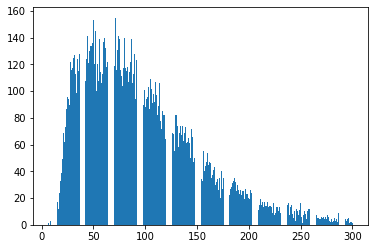

In [ ]:
plt.bar(range(7,301),cts)
plt.show()

# 전처리

In [ ]:
# Tokenizer
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [ ]:
len(tokenizer.word_index)

15213

In [ ]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [ ]:
df_train['Emotion']=df_train.Emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:
Y_train=df_train['Emotion'].values

In [ ]:
# One hot Encoding
Y_train_f=to_categorical(Y_train)
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
X_val=df_val['Sentence']
Y_val=df_val.Emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:
# padding
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [ ]:
Y_val_f=to_categorical(Y_val)
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

# 모델 적합

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

In [ ]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 64)            973568    
_________________________________________________________________
dropout (Dropout)            (None, 80, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense (Dense)                (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12, validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 94s 120ms/step - loss: 1.4654 - accuracy: 0.4057 - val_loss: 0.6419 - val_accuracy: 0.7885
Epoch 2/12
500/500 [==============================] - 58s 117ms/step - loss: 0.5727 - accuracy: 0.7967 - val_loss: 0.3465 - val_accuracy: 0.8830
Epoch 3/12
500/500 [==============================] - 58s 116ms/step - loss: 0.3071 - accuracy: 0.8957 - val_loss: 0.2633 - val_accuracy: 0.9075
Epoch 4/12
500/500 [==============================] - 58s 116ms/step - loss: 0.2197 - accuracy: 0.9261 - val_loss: 0.2556 - val_accuracy: 0.9110
Epoch 5/12
500/500 [==============================] - 58s 116ms/step - loss: 0.1870 - accuracy: 0.9337 - val_loss: 0.2275 - val_accuracy: 0.9205
Epoch 6/12
500/500 [==============================] - 58s 116ms/step - loss: 0.1401 - accuracy: 0.9476 - val_loss: 0.2303 - val_accuracy: 0.9170
Epoch 7/12
500/500 [==============================] - 58s 117ms/step - loss: 0.1310 - accuracy: 0.9507 - val_loss: 0.2043 - val_ac

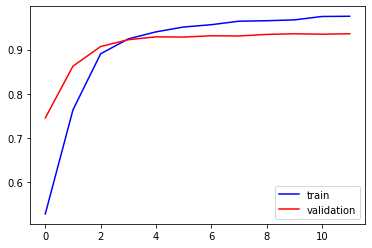

In [ ]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

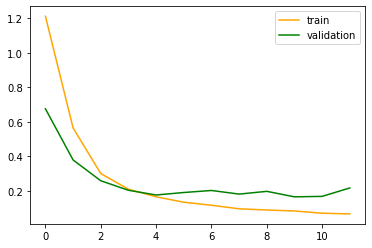

In [ ]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# 모델 평가

In [ ]:
X_test=df_test['Sentence']
Y_test=df_test.Emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [ ]:
Y_test_f=to_categorical(Y_test)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_pad, Y_test_f)
print('test set accuracy: ', test_accuracy)

63/63 [==============================] - 2s 35ms/step - loss: 0.2391 - accuracy: 0.9225
test set accuracy:  0.9225000143051147


# For Submission

In [ ]:
df_score = pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/score.csv',header=0, sep=';',names=['Sentence'],encoding='utf-8')

In [ ]:
X=df_score['Sentence']

In [ ]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)
X_score=tokenizer.texts_to_sequences(X)
X_score_pad=pad_sequences(X_score,maxlen=80,padding='post')

In [ ]:
score_prediction = model.predict(X_score_pad)

In [ ]:
score_prediction_label = [np.argmax(score_prediction[i]) for i in range(len(score_prediction))]
len(score_prediction_label)

1000

In [ ]:
submission_df = pd.DataFrame({"Emotion" : score_prediction_label})
submission_df

submission_df.to_csv('/content/drive/MyDrive/sentimental_analysis_project/data/submission.csv', index=False)

In [ ]:
#################################################################

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) # stopwords
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemming_sentence_score = []

for sentence in df_score['Sentence']:
## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
  word_token = word_tokenize(sentence) # toknize
  word_token = [word for word in word_token if not word in stop_words] # remove stopwords
  word_token = [stemmer.stem(word) for word in word_token] # stemming(어간추출)
  stemming_sentence_score.append(word_token)

In [ ]:
# stemming_sentence_score,를 bow로 표현하기
X_score = tokenizer.texts_to_sequences(stemming_sentence_score)

In [ ]:
# X_score를 padding을 붙여 일정길이로 만들어주기
X_score_pad = pad_sequences(X_score, maxlen=35, padding='post')

In [ ]:
# 모델에서 라벨 추측하기
score_prediction = model.predict(X_score_pad)

In [ ]:
# 최고값 뽑아내기
score_prediction_label = [np.argmax(score_prediction[i]) for i in range(len(score_prediction))]
len(score_prediction_label)

1000

In [ ]:
# 결과값 저장
submission_df = pd.DataFrame({"Emotion" : score_prediction_label})
submission_df

submission_df.to_csv('/content/drive/MyDrive/sentimental_analysis_project/data/submission.csv', index=False)

In [ ]:
##################################################################################

In [ ]:
# 데이터셋 불러오기
df_score = pd.read_csv(('/content/drive/MyDrive/sentimental_analysis_project/data/score.csv',header=0, sep=';',names=['Sentence'],encoding='utf-8')
stemming_sentence_score = []

for sentence in df_score['Sentence']:
    ## training데이터에서 했던것처럼, word_tokenizer와 stemmer를 사용하여 word token sequence로 만들어주세요
    word_token = word_tokenize(sentence) # toknize
    word_token = [word for word in word_token if not word in stop_words] # remove stopwords
    word_token = [stemmer.stem(word) for word in word_token] # stemming(어간추출)
    
    stemming_sentence_score.append(word_token)

## stemming_sentence_score,를 bow로 표현하기
X_score = tokenizer.texts_to_sequences(stemming_sentence_score)

## X_score를 padding을 붙여 일정길이로 만들어주기
X_score_pad = pad_sequences(X_score, maxlen=35, padding='post')

In [ ]:
# 모델에서 라벨 추측하기
score_prediction = model.predict(X_score_pad)

score_prediction = pd.Series(score_prediction.flatten())
score_prediction.value_counts()

In [ ]:
# 결과값 저장 
submission_df = pd.DataFrame({"Emotion" : score_prediction_label})
submission_df

submission_df.to_csv('/content/drive/MyDrive/sentimental_analysis_project/data/submission.csv', index=False,)